# Expressions

In [1]:
import sympy
sympy.init_printing()

In [2]:
from sympy import I, pi, oo

In [36]:
x = sympy.Symbol("x")
y = sympy.Symbol("y")
z = sympy.Symbol("z")
expr = 1 + 2 * x**2 + 3 * x**3
expr

Nevertheless, to understand how SymPy works,
it is important to know how expressions are represented.

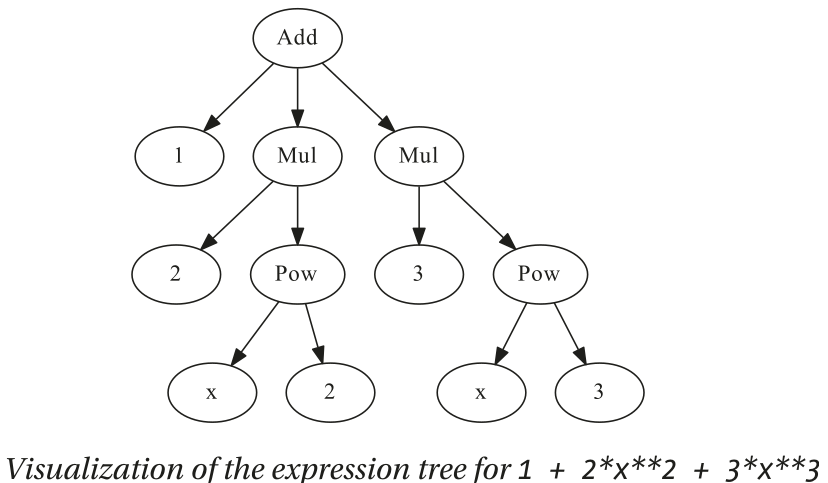

### You can see the data structure of this expression

In [5]:
expr.args

In [7]:
expr.args[1]

In [8]:
expr.args[1].args[1]

In [11]:
expr.args[1].args[1].args[0]

In [10]:
expr.args[1].args[1].args[0].args

## Manipulating Expressions

> Manipulating expression trees is one of the main jobs for SymPy, and numerous
functions are provided for different types of transformations. The general idea is
that expression trees can be transformed between mathematically equivalent forms
using simplification and rewrite functions. These functions generally do not change
the expressions that are passed to the functions, but rather create a new expression
that corresponds to the modified expression. Expressions in SymPy should thus be
considered immutable objects (that cannot be changed). All the functions we consider
in this section treat SymPy expressions as immutable objects and return new expression
trees rather than modify expressions in place.

## Simplification

> The most desirable manipulation of a mathematical expression is to simplify it. This
is perhaps and also the most ambiguous operation, since it is nontrivial to determine
algorithmically if one expression appears simpler than another to a human being,
and in general it is also not obvious which methods should be employed to arrive at a
simpler expression. Nonetheless, black-box simplification is an important part of any
CAS, and SymPy includes the function sympy.simplify that attempts to simplify a given
expression using a variety of methods and approaches. The simplification function can
also be invoked through the method simplify, as illustrated in the following example

### Create and then simplify the expression

In [15]:
expr = 2 * (x**2 - x) - x * (x + 1)
expr

In [16]:
sympy.simplify(expr)

In [18]:
expr.simplify()

`sympy.simplify` returns new expression that can be simplify by various of ways.

### Example with trig simplifications

In [20]:
expr = 2 * sympy.cos(x) * sympy.sin(x)
expr

In [21]:
expr.simplify()

#### one more example with exponent multipliers simplification

In [24]:
expr = sympy.exp(x) * sympy.exp(y)
expr

In [25]:
expr.simplify()

>Each specific type of simplification can also be carried out with more specialized
functions, such as sympy.trigsimp and sympy.powsimp, for trigonometric and power
simplifications, respectively. These functions only perform the simplification that their
names indicate and leave other parts of an expression in its original form. A summary
of simplification functions is given in Table

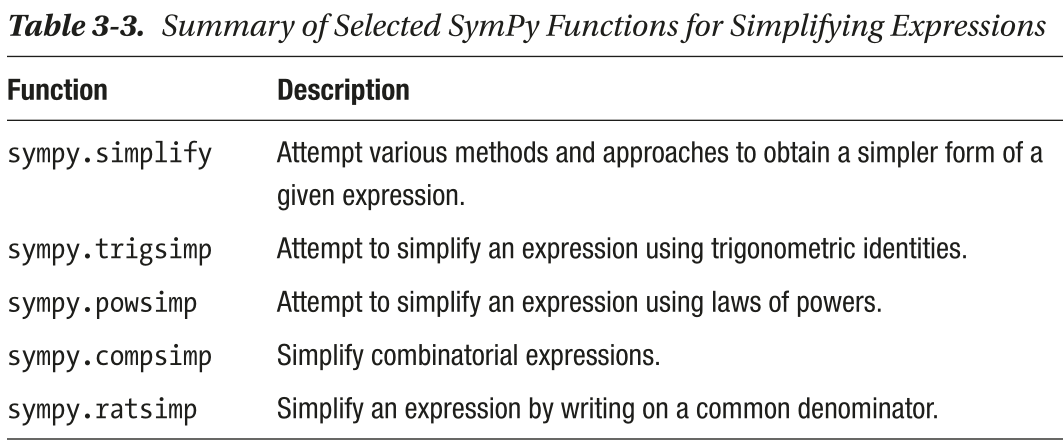

## Expand

An important tool in this process is to expand
expression in various ways. The function sympy.expand performs a variety of expansions, depending on the values of optional keyword arguments.

In [26]:
expr = (x + 1) * (x + 2)
expr.expand()

In [27]:
sympy.sin(x + y).expand(trig=True)

### log=True for expanding logarithms,

In [29]:
a, b = sympy.symbols("a, b", positive=True)

sympy.log(a * b).expand(log=True)

### complex=True for separating real and imaginary parts of an expression

In [30]:
sympy.exp(I*a + b).expand(complex=True)

### and power_base=True and power_exp=True for expanding the base and the exponent of a power expression, respectively.

In [31]:
sympy.expand((a * b)**x, power_base=True)

In [33]:
sympy.exp((a-b)*x).expand(power_exp=True)

## Factor, Collect, and Combine

> Factor can be used to factor algebraic expressions, such as

In [34]:
sympy.factor(x**2 - 1)

In [37]:
# Factor x from the trig
sympy.factor(x * sympy.cos(y) + sympy.sin(z) * x)

### The inverse of the other types of expansions in the previous section can be carried out using sympy.trigsimp, sympy.powsimp, and sympy.logcombine, for example

In [38]:
sympy.logcombine(sympy.log(a) - sympy.log(b))

> When working with mathematical expressions, it is often necessary to have fine-­
grained control over factoring. The SymPy function sympy.collect factors terms that
contain a given symbol or list of symbols. For example, x+y+xyz cannot be completely
factorized, but we can partially factor terms containing x or y:

In [40]:
expr = x + y + x * y * z
expr.collect(x)

In [41]:
expr.collect(y)

> Also, when using the method collect, which returns the new expression, it is possible to
chain multiple method calls in the following way:

In [47]:
expr = sympy.cos(x + y) + sympy.sin(x - y)
expr.expand(trig=True).collect([sympy.cos(x), sympy.sin(x)]).collect(sympy.cos(y)-sympy.sin(y))

## Apart, Together, and Cancel

> The functions sympy.apart and sympy.together, which, respectively,
rewrite a fraction as a partial fraction and combine partial fractions to a single fraction,
can be used in the following way

In [49]:
sympy.apart(1/(x**2 + 3*x + 2), x)

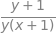

In [50]:
sympy.together(1 / (y * x + y) + 1 / (1+x))

In [51]:
sympy.cancel(y / (y * x + y))

## Substitutions

> In the most basic use of subs, the method is called in an expression, and the symbol
or expression that is to be replaced (x) is given as the first argument, and the new symbol
or the expression (y) is given as the second argument

In [53]:
(x + y).subs(x, y)

In [54]:
sympy.sin(x * sympy.exp(x)).subs(x, y)

> Instead of chaining multiple subs calls when multiple substitutions are required, we
can alternatively pass a dictionary as the first and only argument to subs that maps old
symbols or expressions to new symbols or expressions:

In [56]:
sympy.sin(x * z).subs({z: sympy.exp(y), x: y, sympy.sin: sympy.cos})

> A convenient way of doing this is to define a dictionary that translates the symbols to
numerical values and pass this dictionary as the argument to the subs method. For
example, consider

In [57]:
expr = x * y + z**2 *x
values = {x: 1.25, y: 0.4, z: 3.2}
expr.subs(values)